In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 20
FirstStim = 8.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345786 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

73.714489 seconds
[ 0.]
[ 0.]
76.659503 seconds
[ 0.]
[ 0.]
77.882047 seconds
[ 0.]
[ 0.]
78.162655 seconds
[ 0.]
[ 0.]
79.005993 seconds
[ 0.]
[ 0.]
79.376585 seconds
[ 0.]
[ 0.05265829]
80.046155 seconds
[ 0.]
[ 0.41132315]
80.371677 seconds
[ 0.]
[ 1.07901316]
80.926175 seconds
[ 1.2960276]
[ 1.78533863]
81.185787 seconds
[ 1.8101013]
[ 2.60306005]
81.620735 seconds
[ 2.51885894]
[ 2.55325753]
81.913607 seconds
[ 3.05105011]
[ 1.89507689]
82.526342 seconds
[ 3.59337107]
[ 1.33662867]
83.122506 seconds
[ 4.02919366]
[ 0.85140101]
83.514139 seconds
[ 4.36911481]
[ 0.53823509]
83.669673 seconds
[ 4.59458647]
[ 0.27496775]
83.961355 seconds
[ 4.67764182]
[ 0.09815391]
82.710261 seconds
[ 4.73473053]
[ 0.00919632]
81.987219 seconds
[ 4.72509882]
[  1.09113793e-07]
81.853671 seconds
[ 4.75445216]
[  1.02251236e-07]


<IPython.core.display.Javascript object>


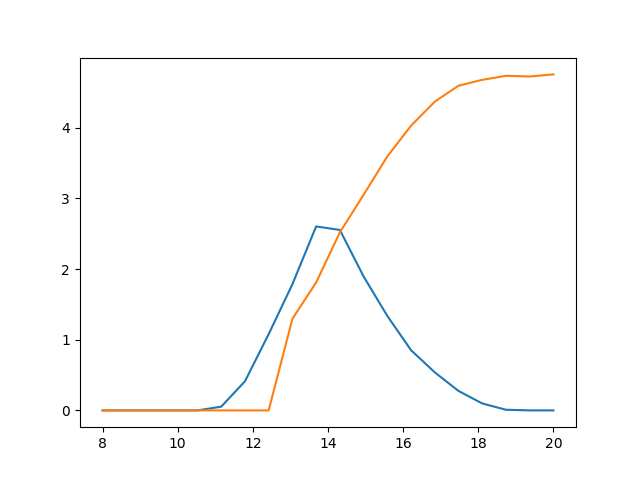

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.5474994733514712

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.2960276 ],
       [ 1.8101013 ],
       [ 2.51885894],
       [ 3.05105011],
       [ 3.59337107],
       [ 4.02919366],
       [ 4.36911481],
       [ 4.59458647],
       [ 4.67764182],
       [ 4.73473053],
       [ 4.72509882],
       [ 4.75445216]])

<IPython.core.display.Javascript object>


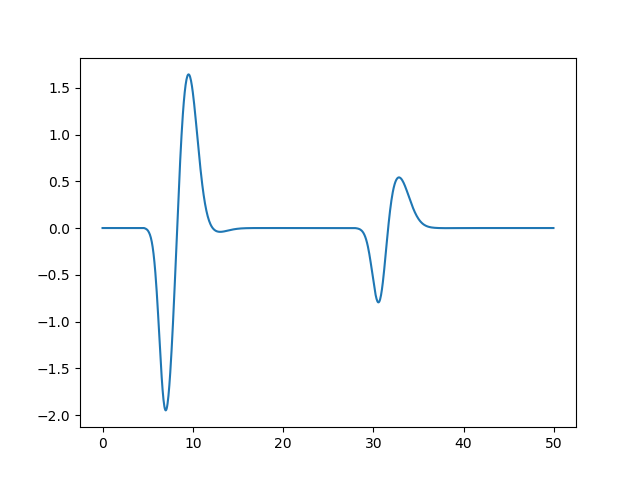

In [8]:
plt.figure()
plt.plot(t, emg[:,12])

In [9]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


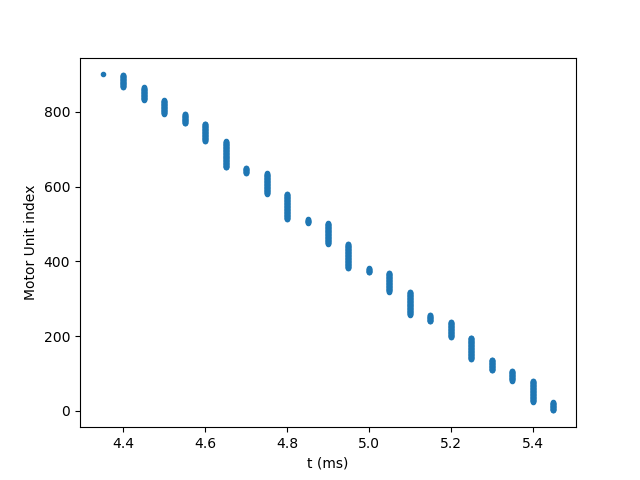

In [10]:
plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

In [11]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)